### 퀵정렬 병합정렬 힙정렬 도수정렬

In [ ]:
# [Do it! 실습 6-10] 퀵 정렬 알고리즘 구현

from typing import MutableSequence

def qsort(a: MutableSequence, left: int, right: int) -> None:
    """
    퀵소트 
    1. 기준점을 기준으로 왼쪽에는 작은원소 오른쪽에는 기준보다 큰원소를 모은다
    2. 작은원소들을 모은곳에서 또 기준점을 정한후 기준점을 기준으로 작은 큰원소를 분할시킨다
    3. 언제까지..? left=pr right=pl 일때까지..
    """
    pl = left                   
    pr = right                 
    x = a[(left + right) // 2]  # 기준점 left right 중간
    # pl pr x 는 전부 idx이다 원소값이아니다....

    while pl <= pr:    # 서로 엇갈리지않는동안 즉 pr값이 더큰동안..
        while a[pl] < x: pl += 1 # 기준점으로 pl은 원소들이 작아야한다 기준보다 커서가 멈추는지점은 기준점보다 큰곳idx
        while a[pr] > x: pr -= 1 #기준점을 기준으로 pr은 원소들이 커야한다 멈추는곳은 기준점보다 원소가 작은지점...
        if pl <= pr: # pl pr은 원소value가아닌 idx값이다 착오금지...
            a[pl], a[pr] = a[pr], a[pl]
            pl += 1
            pr -= 1

    # left right pr pl 은 전부 idx위치이다 원소값이아니다..
    # 즉 left==pr 이라면 원소가 1개여서 정렬불필요...
    if left < pr: qsort(a, left, pr) # left pr 은 위치값이다
    if pl < right: qsort(a, pl, right)
    """
    1.기준이되는 데이터인 pivot을 하나 선택한다
    2. pivot보다 작은데이터와 pivot보다 큰 데이터로 구분한다
    """
    

def quick_sort(a: MutableSequence) -> None:
    """퀵 정렬"""
    qsort(a, 0, len(a) - 1)

if __name__ == '__main__':
    print('퀵 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num   # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    quick_sort(x)      # 배열 x를 퀵 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

In [ ]:
# [Do it! 실습 6-15] 병합 정렬 알고리즘 구현하기

from typing import MutableSequence

def merge_sort(a: MutableSequence) -> None:


    def _merge_sort(a: MutableSequence, left: int, right: int) -> None:
        if left < right: # left right 는 idx번호이다
            center = (left + right) // 2 #Center를 기준으로 2개로쪼갠다

            _merge_sort(a, left, center)  # 재귀호출로 원본배열의 왼쪽부분을 정렬시킨다
            _merge_sort(a, center + 1, right) # 재귀호출로 원본배열의 오른쪽부분을 정렬시킨다

            p = j = 0
            i = k = left

            while i <= center: # 원본배열의 앞부분을 작업용buffer에 붙혀넣기..
                 buff[p] = a[i]
                 p += 1
                 i += 1

            while i <= right and j < p: #배열뒷부분과 작업용버퍼를 비교하여 원본배열애 정렬시킨다
                 if buff[j] <= a[i]: #작업용배열의 원소가 작다면 원본배열의 뒷부분의 원소가 크다는것 작업용배열의 원소보다
                     a[k] = buff[j] #그러므로 원본배열에 버퍼의 원소를 삽입한다
                     j += 1 #작업용배열에서 삽입했으므로 작업용배열의 칸수를 하나 증가시킨다..
                 else: #원본배열의 뒷부분의 원소가 크다는것이다..
                     a[k] = a[i] # 그러므로 원본배열에다가 원본배열의 뒷부분의 원소를 삽입한다
                     i += 1 # 원본배열의 뒷부분에서 삽입한거이므로 원본배열의 뒷부분의 idx를 증가시킨다
                 k += 1

            while j < p: #작업용배열에서 남은 원소들을 원본배열의 뒷부분에 붙힌다..
                a[k] = buff[j] 
                k += 1
                j += 1

    n = len(a)
    buff = [None] * n           
    _merge_sort(a, 0, n - 1)    
    del buff                   

if __name__ == '__main__':
    print('병합 정렬을 수행합니다')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num    # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    merge_sort(x)       # 배열 x를 병합 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

In [ ]:
# [Do it! 실습 6-17] 도수 정렬 알고리즘 구현하기

from typing import MutableSequence

def fsort(a: MutableSequence, max: int) -> None:
    """도수 정렬(배열 원솟값은 0 이상 max 이하)"""
    n = len(a)       # 배열의 길이 
    f = [0] * (max + 1)  # 누적도수 분포표 카운팅 배열
    b = [0] * n         #  작업용 배열

    for i in range(n):       
        f[a[i]] += 1 # a[i]의 원소값을 f[원소값] idx 번호에서 하나증가시킨다               
        
    for i in range(1, max + 1):     
        f[i] += f[i - 1]  # 누적도수 분포포 구성... 앞의idx의 value들을 합산해간다       
       
    for i in range(n - 1, -1, -1):# 스캔방향 top -> bottom
        f[a[i]] -= 1 
        b[f[a[i]]] = a[i]  #작업용배열에다가 원본배열의 원소를 삽입한다
         
    for i in range(n):              
        a[i] = b[i]                    

def counting_sort(a: MutableSequence) -> None:
    """도수 정렬"""
    fsort(a, max(a))

if __name__ == '__main__':
    print('도수 정렬을 합니다.')
    num = int(input('원소 수를 입력하세요. : '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):  # 양수만 입력받음
        while True:
            x[i] = int(input(f'x[{i}] : '))
            if x[i] >= 0: break

    counting_sort(x)  # 배열 x를 도수 정렬

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

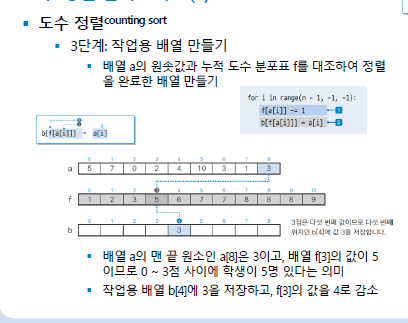